# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [51]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None)
print(df.iloc[:, :5].head())

       0      1       2      3      4
0  15.26  14.84  0.8710  5.763  3.312
1  14.88  14.57  0.8811  5.554  3.333
2  14.29  14.09  0.9050  5.291  3.337
3  13.84  13.94  0.8955  5.324  3.379
4  16.14  14.99  0.9034  5.658  3.562


Next, you will need to separate the data into your feature matrix and target vector.

In [52]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop(columns=7)
y = df[7]
print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [53]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# TODO: Print the shape of the training feature matrix and target vector
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (168, 7)
y_train shape: (168,)


Now that we have our training data, we can implement our selected scaler.

In [55]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [56]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000) 


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [57]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [58]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
cv_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

test_score = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Cross-validation Score:", cv_score)
print("Test Score:", test_score)

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Cross-validation Score: 0.9467023172905525
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [59]:
# TODO: Predict y labels using best estimator
from sklearn.decomposition import PCA
y_pred = best_model.predict(X_test_scaled)

In [60]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=2)

X_test_pca = pca.fit_transform(X_test_scaled)

/var/folders/x7/fq5l7tx521l_cp0w171999fr0000gp/T/ipykernel_92672/185974641.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


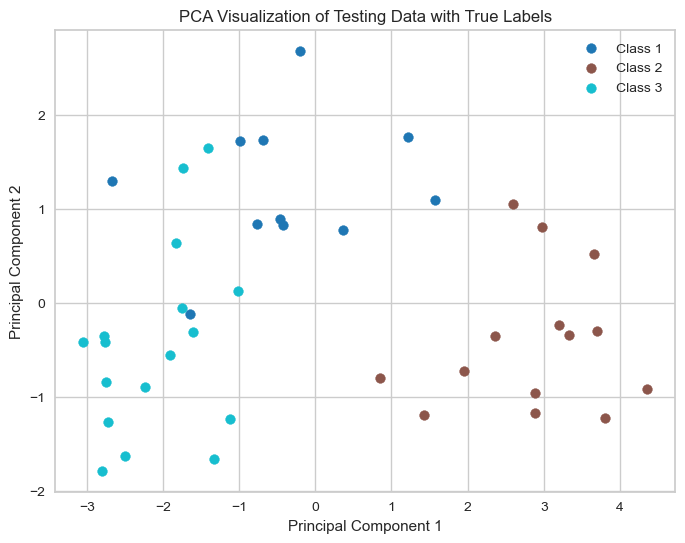

In [61]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 6))

unique_labels = np.unique(y_test)

colors = plt.cm.get_cmap('tab10', len(unique_labels))  

for i, label in enumerate(unique_labels):
    plt.scatter(X_test_pca[y_test == label, 0], X_test_pca[y_test == label, 1],
                color=colors(i), label=f'Class {label}')

plt.title('PCA Visualization of Testing Data with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. Yes, this model worked well. The scores for both the training and testing data were high and close together (low bias and low variance).
1. Yes it seems to have worked well. The predicted labels are grouped together nicely. Both PCA and logistic regression are both linear. We could assume that this dataset is linear, since both PCA and logistic regression worked well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced the code mostly from my own knowledge built up over the course of the semester, as well as notes and python notebooks available to us.
2. I completed the steps in the logical order that they were outlined.
3. I used generative AI to help me in generating the plot. I passed it the code I had so far and it helped me in formatting the plot properly.
4. I did not have any challenges for this part of the assignment.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [62]:
# TODO: Scale feature matrix
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

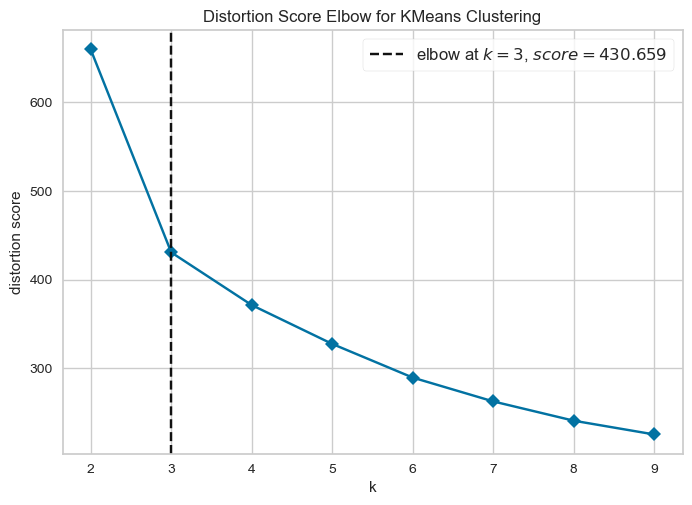

In [63]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), X_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [64]:
# TODO: Implement K-means with the number of clusters determined in the previous step
n_clusters_optimal = ke.elbow_value_  

kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=4, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=4)

In [65]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

cluster_labels = kmeans.labels_

silhouette = silhouette_score(X_scaled, cluster_labels)

calinski = calinski_harabasz_score(X_scaled, cluster_labels)

davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Davies-Bouldin Score:", davies_bouldin)

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.78417491616472
Davies-Bouldin Score: 0.9278712249013427


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

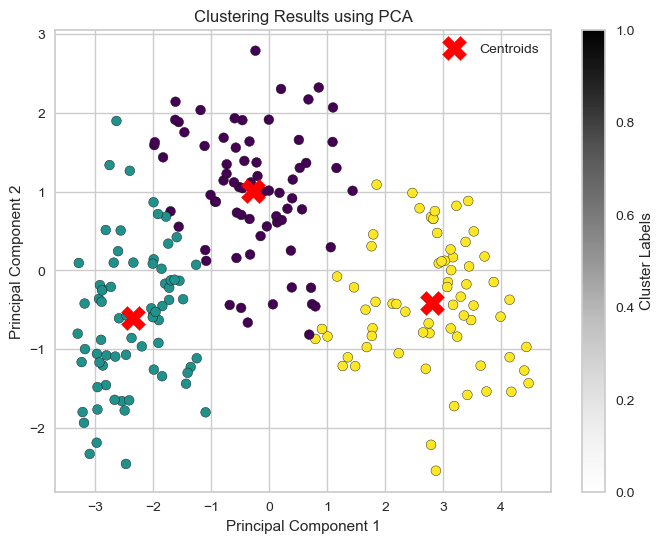

In [66]:
# TODO: Plot clustering results

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.title('Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.legend()

plt.colorbar(label='Cluster Labels')
plt.grid(True)
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [67]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components required for 95% variance:", n_components_95)


Number of components required for 95% variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [68]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)

In [69]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=n_clusters_optimal, random_state=4, n_init=10)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, n_init=10, random_state=4)

In [70]:
# TODO: Calculate the three different validation metrics
cluster_labels_pca = kmeans_pca.labels_

silhouette_pca = silhouette_score(X_pca, cluster_labels_pca)

calinski_pca = calinski_harabasz_score(X_pca, cluster_labels_pca)

davies_bouldin_pca = davies_bouldin_score(X_pca, cluster_labels_pca)

print("Silhouette Score (PCA-transformed data):", silhouette_pca)
print("Calinski-Harabasz Score (PCA-transformed data):", calinski_pca)
print("Davies-Bouldin Score (PCA-transformed data):", davies_bouldin_pca)

Silhouette Score (PCA-transformed data): 0.4088533197603697
Calinski-Harabasz Score (PCA-transformed data): 260.2022618176822
Davies-Bouldin Score (PCA-transformed data): 0.9056643680171851


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [71]:
# TODO: Display results
results = {
    'Silhouette Score': [silhouette_pca],
    'Calinski-Harabasz Score': [calinski_pca],
    'Davies-Bouldin Score': [davies_bouldin_pca]
}

results_df = pd.DataFrame(results)

print("Validation Metrics for PCA-transformed Data")
print(results_df)

Validation Metrics for PCA-transformed Data
   Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
0          0.408853               260.202262              0.905664


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The orginal dataset had three class labels, so it makes sense that the optimal number of clusters was three.
1. Yes, the plots have similar distributions for the three classes.
1. I used two components to explain at least 95% of the variance. Yes, using PCA improved my results. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Sourced my code mostly from the notebooks and my own knowledge. I also used generative AI for a couple of things for this part.
2. I completed them in the logical order that they were outlined in.
3. I used generative AI to help me with using the variance ratio to determine the number of components needed for greater than 95% variance. I just prompted it with the code I had so far and what I wanted it to do. I did not need to modify it's response. I also used it to help me in generating the plot. Again, I passed it the code I had so far and it helped me in formatting the plot properly.
4. No challenges in this part of the assignment.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed this assignment because by working through all the steps I gained a much better understanding of the K-means clustering and PCA. I also learned more about the methods that we have at our disposal (like explained_variance_ratio) and what they fundamentally mean. It was also interesting seeing how transforming the data with PCA changes the results of the model as opposed to just scaling it without PCA. 
